# Exploratory Data Analysis, Sentiment Analysis and Topic Modelling
---

In [1]:
#Importing modules and data
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import datetime as dt
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 15
width = 0.75
sns.set_palette(sns.color_palette('tab20', 20))
import plotly.graph_objs as go
from datetime import date, timedelta
from empath import Empath

lexicon = Empath()
import math
from textblob import TextBlob
from detoxify import Detoxify
import chart_studio.plotly as py
from plotly.offline import iplot
import plotly.express as px
import plotly.figure_factory as ff
import cufflinks

cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

data = pd.read_csv(
    '/Users/qab/Desktop/Personal/NLP Projects/Context Maturity (NLP)/Data/jon_bellion.csv'
)

In [2]:
data.head()

,titles,album,date_released,lyrics,processed_lyrics
0,dead man wallking,translation_through_speakers,"February 20, 2013","[Intro]\nYou know, maybe I'm drunk, maybe I'm ...",know maybe drunk maybe maybe happened maybe ca...
1,dont ask cuz i dont know,translation_through_speakers,"February 20, 2013","[Verse 1]\nYeah, see, check the bounce out\nWe...",see check bounce welcome dope flow welcome bo...
2,for the dreamers,translation_through_speakers,"February 20, 2013","[Intro: Jon Bellion]\nLike some dope shit, ohh...",like dope shit like mad people ...
3,life,translation_through_speakers,"February 20, 2013",[Verse 1]\n22 and confused\nOn what to do and ...,confuse set kind drunk sort high break miss a...
4,paper planes,translation_through_speakers,"February 20, 2013","[Verse 1]\nOh, that ass, it was so first class...",ass first class copilot mile high swag would ...


## Drawing Empath Themes

In [3]:
#Finds the empath themes in the lyrics
def extract_empath(lyrics):
    return lexicon.analyze(lyrics)


#Creates tags with the empath themes based on score
def make_tags(tags):
    #tgs = [k for k, v in tags.items() if v != 0][:5] #Helps set limit on tags to be kept
    tgs = sorted(tags, key=tags.get, reverse=True)[:5]
    #sorted(A, key=A.get, reverse=True)[:5]
    return tgs


#Processes the dictionary of tags and keeps the keys
def process(st):
    st = str(st)
    table = str.maketrans(dict.fromkeys(string.punctuation))
    new_s = st.translate(table)
    return new_s


data['empath_themes'] = data['lyrics'].apply(extract_empath).apply(
    make_tags)  #.apply(process).apply(lambda x: ''.join(x))

In [4]:
data

,titles,album,date_released,lyrics,processed_lyrics,empath_themes
0,dead man wallking,translation_through_speakers,"February 20, 2013","[Intro]\nYou know, maybe I'm drunk, maybe I'm ...",know maybe drunk maybe maybe happened maybe ca...,"[death, negative_emotion, kill, violence, frie..."
1,dont ask cuz i dont know,translation_through_speakers,"February 20, 2013","[Verse 1]\nYeah, see, check the bounce out\nWe...",see check bounce welcome dope flow welcome bo...,"[communication, speaking, movement, optimism, ..."
2,for the dreamers,translation_through_speakers,"February 20, 2013","[Intro: Jon Bellion]\nLike some dope shit, ohh...",like dope shit like mad people ...,"[listen, hearing, speaking, negative_emotion, ..."
3,life,translation_through_speakers,"February 20, 2013",[Verse 1]\n22 and confused\nOn what to do and ...,confuse set kind drunk sort high break miss a...,"[fun, masculine, communication, appearance, da..."
4,paper planes,translation_through_speakers,"February 20, 2013","[Verse 1]\nOh, that ass, it was so first class...",ass first class copilot mile high swag would ...,"[air_travel, Anime, movement, traveling, beach]"
5,the wonder years,translation_through_speakers,"February 20, 2013","[Verse 1]\nBefore the war, before the lives\nB...",war live brother leave night kid sing ...,"[love, family, music, listen, children]"
6,timeless,translation_through_speakers,"February 20, 2013",[Chorus]\nFell asleep I had a kick-ass dream\n...,fell asleep kickass dream me frank sinatra jam...,"[morning, night, sleep, alcohol, nervousness]"
7,waves of loneliness,translation_through_speakers,"February 20, 2013",[Verse 1]\nIt's so empty right where your head...,empty right head sleep say still smell cologn...,"[fear, neglect, sadness, disappointment, love]"
8,while you count sheep,translation_through_speakers,"February 20, 2013","[Intro]\nDum, dum, dum, dum, dum, dum\nDum, du...",beautiful mind mind mind literall...,"[music, dance, morning, hearing, listen]"
9,wutup snow,translation_through_speakers,"February 20, 2013","[Pre-Chorus: Jon Bellion]\nHer body is cold, t...",body cold conversation cocaine call snow new ...,"[listen, cold, love, communication, speaking]"


In [7]:
#Number of songs per album
data.groupby('album').count()['titles'].sort_values(ascending=False).iplot(
    kind='bar',
    yTitle='Number of songs',
    linecolor='black',
    opacity=0,
    title='Bar chart of songs per album release',
    xTitle='Albums')

## Word count of lyrics before and after text preprocessing.

In [8]:
# Word count
word_count = lambda x: len(str(x).split())
data['song_length'] = data['lyrics'].astype(str).apply(len)
data['lyrics_word_count'] = data['lyrics'].apply(word_count)
data['processed_lyrics_word_count'] = data['processed_lyrics'].apply(
    word_count)
data.head()

,titles,album,date_released,lyrics,processed_lyrics,empath_themes,song_length,lyrics_word_count,processed_lyrics_word_count
0,dead man wallking,translation_through_speakers,"February 20, 2013","[Intro]\nYou know, maybe I'm drunk, maybe I'm ...",know maybe drunk maybe maybe happened maybe ca...,"[death, negative_emotion, kill, violence, frie...",2454,474,263
1,dont ask cuz i dont know,translation_through_speakers,"February 20, 2013","[Verse 1]\nYeah, see, check the bounce out\nWe...",see check bounce welcome dope flow welcome bo...,"[communication, speaking, movement, optimism, ...",2120,408,179
2,for the dreamers,translation_through_speakers,"February 20, 2013","[Intro: Jon Bellion]\nLike some dope shit, ohh...",like dope shit like mad people ...,"[listen, hearing, speaking, negative_emotion, ...",3103,598,267
3,life,translation_through_speakers,"February 20, 2013",[Verse 1]\n22 and confused\nOn what to do and ...,confuse set kind drunk sort high break miss a...,"[fun, masculine, communication, appearance, da...",1614,309,129
4,paper planes,translation_through_speakers,"February 20, 2013","[Verse 1]\nOh, that ass, it was so first class...",ass first class copilot mile high swag would ...,"[air_travel, Anime, movement, traveling, beach]",1865,367,198


/Users/qab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='lyrics', ylabel='Density'>

/Users/qab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='lyrics', ylabel='Density'>

/Users/qab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='lyrics', ylabel='Density'>

/Users/qab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='lyrics', ylabel='Density'>

/Users/qab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='lyrics', ylabel='Density'>

Text(0.5, 1.0, 'Length of lyrics per album released (Lyrics Not Processed)')

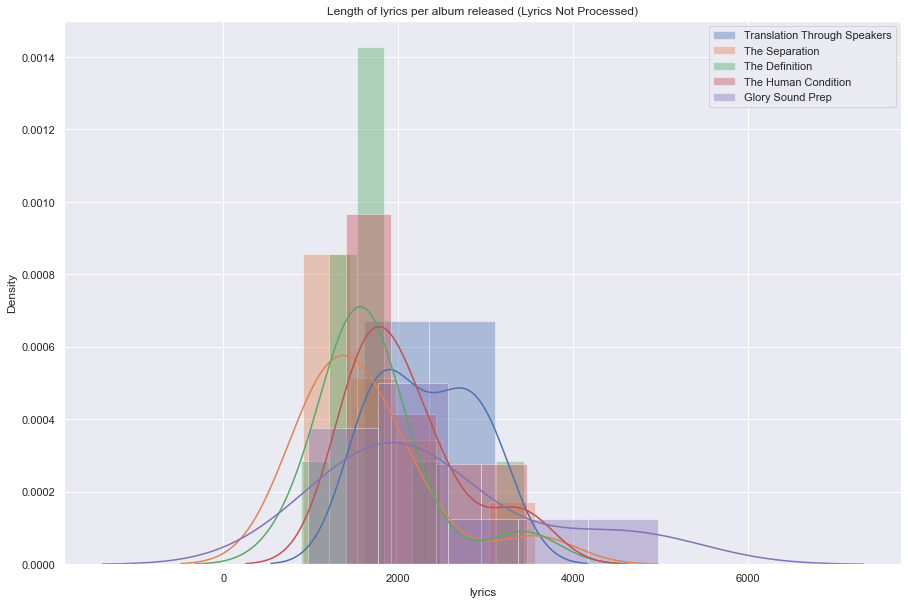

In [14]:
# Length of all songs per album for unprocessed lyrics
sns.set(rc={'figure.figsize': (15, 10)})
album1 = data[data['album'] ==
              'translation_through_speakers']['lyrics'].str.len()
sns.distplot(album1, label='Translation Through Speakers')
album2 = data[data['album'] == 'the_separation']['lyrics'].str.len()
sns.distplot(album2, label='The Separation')
album3 = data[data['album'] == 'the_definition']['lyrics'].str.len()
sns.distplot(album3, label='The Definition')
album4 = data[data['album'] == 'the_human_condition']['lyrics'].str.len()
sns.distplot(album4, label='The Human Condition')
album5 = data[data['album'] == 'glory_sound_prep']['lyrics'].str.len()
sns.distplot(album5, label='Glory Sound Prep')
plt.title('Length of lyrics per album released (Lyrics Not Processed)')
plt.legend()

/Users/qab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='processed_lyrics', ylabel='Density'>

/Users/qab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='processed_lyrics', ylabel='Density'>

/Users/qab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='processed_lyrics', ylabel='Density'>

/Users/qab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='processed_lyrics', ylabel='Density'>

/Users/qab/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='processed_lyrics', ylabel='Density'>

Text(0.5, 1.0, 'Length of lyrics per album released (Pre-Processed Lyrics)')

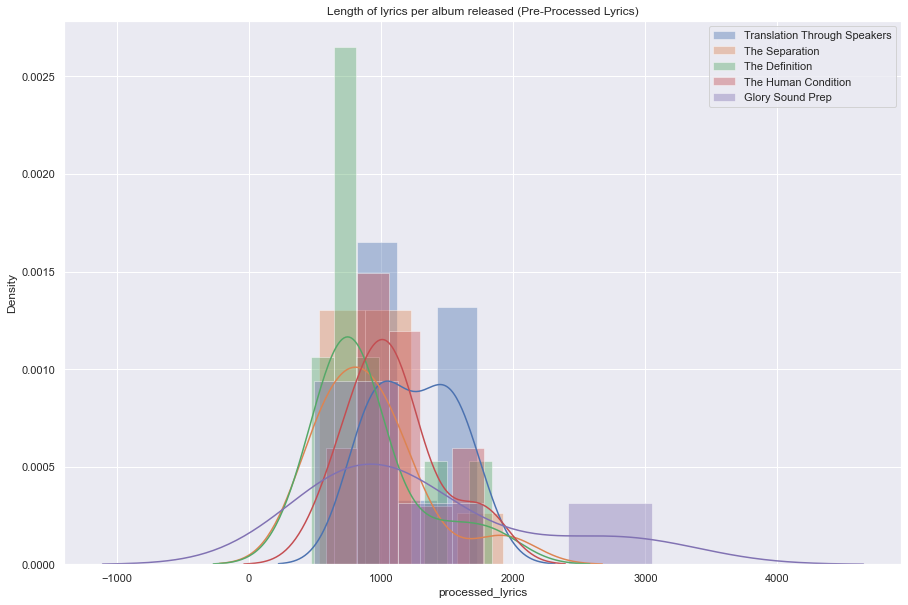

In [15]:
# Length of all songs per album for processed lyrics
sns.set(rc={'figure.figsize': (15, 10)})
album1 = data[data['album'] ==
              'translation_through_speakers']['processed_lyrics'].str.len()
sns.distplot(album1, label='Translation Through Speakers')
album2 = data[data['album'] == 'the_separation']['processed_lyrics'].str.len()
sns.distplot(album2, label='The Separation')
album3 = data[data['album'] == 'the_definition']['processed_lyrics'].str.len()
sns.distplot(album3, label='The Definition')
album4 = data[data['album'] ==
              'the_human_condition']['processed_lyrics'].str.len()
sns.distplot(album4, label='The Human Condition')
album5 = data[data['album'] ==
              'glory_sound_prep']['processed_lyrics'].str.len()
sns.distplot(album5, label='Glory Sound Prep')
plt.title('Length of lyrics per album released (Pre-Processed Lyrics)')
plt.legend()

In [16]:
#Distribution of songs and their length
data['song_length'].iplot(
    kind = 'hist',
    bins = 56, #A small database so I limited this to the number of rows so the spread will be even. 
    xTitle = 'Song Length',
    linecolor = 'black',
    yTitle = 'Number of Songs',
    title = 'Song Length Distribution')

In [17]:
# Word count of lyrics before and after cleaning
data[['lyrics_word_count', 'processed_lyrics_word_count']].iplot(
    kind = 'hist',
    bins = 20, #A small database so I limited this to the number of rows so the spread will be even. 
    xTitle = 'Word Count',
    linecolor = 'black',
    yTitle = 'Number of Songs',
    title = 'Lyrics Count Per Song Distribution Before and After Pre-processing')

## Sentiment, Toxicity and Subjectivity.

In [18]:
#Setting polarity and subjectivity with Textblob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

#Creating new features for polarity and subjectivity
data['polarity'] = data['lyrics'].apply(pol)
data['subjectivity'] = data['lyrics'].apply(sub)
data.head()

,titles,album,date_released,lyrics,processed_lyrics,empath_themes,song_length,lyrics_word_count,processed_lyrics_word_count,polarity,subjectivity
0,dead man wallking,translation_through_speakers,"February 20, 2013","[Intro]\nYou know, maybe I'm drunk, maybe I'm ...",know maybe drunk maybe maybe happened maybe ca...,"[death, negative_emotion, kill, violence, frie...",2454,474,263,0.032692,0.464957
1,dont ask cuz i dont know,translation_through_speakers,"February 20, 2013","[Verse 1]\nYeah, see, check the bounce out\nWe...",see check bounce welcome dope flow welcome bo...,"[communication, speaking, movement, optimism, ...",2120,408,179,0.309140,0.495161
2,for the dreamers,translation_through_speakers,"February 20, 2013","[Intro: Jon Bellion]\nLike some dope shit, ohh...",like dope shit like mad people ...,"[listen, hearing, speaking, negative_emotion, ...",3103,598,267,0.027602,0.655745
3,life,translation_through_speakers,"February 20, 2013",[Verse 1]\n22 and confused\nOn what to do and ...,confuse set kind drunk sort high break miss a...,"[fun, masculine, communication, appearance, da...",1614,309,129,0.052500,0.697500
4,paper planes,translation_through_speakers,"February 20, 2013","[Verse 1]\nOh, that ass, it was so first class...",ass first class copilot mile high swag would ...,"[air_travel, Anime, movement, traveling, beach]",1865,367,198,0.241650,0.562948


In [19]:
data.describe()

,song_length,lyrics_word_count,processed_lyrics_word_count,polarity,subjectivity
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,2031.321429,394.214286,185.785714,0.067117,0.518335
std,822.277660,152.335242,81.128790,0.161391,0.135905
min,889.000000,177.000000,83.000000,-0.442708,0.198056
25%,1552.750000,298.500000,132.750000,-0.015400,0.448355
50%,1794.500000,360.500000,166.500000,0.071917,0.516809
75%,2436.500000,442.500000,217.250000,0.172301,0.604329
max,4965.000000,926.000000,487.000000,0.525000,0.931250


## Toxicity

In [20]:
toxicity_dict = []
for lyric in data['lyrics']:
    toxicity = Detoxify('original').predict(lyric)
    toxicity_dict.append(toxicity)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [21]:
#toxicity_dict
toxicity_df = pd.DataFrame(toxicity_dict)
#toxicity_df
data = pd.concat([data, toxicity_df], axis = 1)
#data.to_csv('Jon Bellion Discography DS Metadata.csv')
data.head()

,titles,album,date_released,lyrics,processed_lyrics,empath_themes,song_length,lyrics_word_count,processed_lyrics_word_count,polarity,subjectivity,toxicity,severe_toxicity,obscene,threat,insult,identity_hate
0,dead man wallking,translation_through_speakers,"February 20, 2013","[Intro]\nYou know, maybe I'm drunk, maybe I'm ...",know maybe drunk maybe maybe happened maybe ca...,"[death, negative_emotion, kill, violence, frie...",2454,474,263,0.032692,0.464957,0.480705,0.007319,0.189375,0.049681,0.066411,0.016786
1,dont ask cuz i dont know,translation_through_speakers,"February 20, 2013","[Verse 1]\nYeah, see, check the bounce out\nWe...",see check bounce welcome dope flow welcome bo...,"[communication, speaking, movement, optimism, ...",2120,408,179,0.309140,0.495161,0.046998,0.000374,0.013157,0.000414,0.003434,0.000614
2,for the dreamers,translation_through_speakers,"February 20, 2013","[Intro: Jon Bellion]\nLike some dope shit, ohh...",like dope shit like mad people ...,"[listen, hearing, speaking, negative_emotion, ...",3103,598,267,0.027602,0.655745,0.442370,0.005187,0.349429,0.003059,0.101298,0.014040
3,life,translation_through_speakers,"February 20, 2013",[Verse 1]\n22 and confused\nOn what to do and ...,confuse set kind drunk sort high break miss a...,"[fun, masculine, communication, appearance, da...",1614,309,129,0.052500,0.697500,0.015007,0.000162,0.002077,0.000244,0.000758,0.000262
4,paper planes,translation_through_speakers,"February 20, 2013","[Verse 1]\nOh, that ass, it was so first class...",ass first class copilot mile high swag would ...,"[air_travel, Anime, movement, traveling, beach]",1865,367,198,0.241650,0.562948,0.585125,0.005497,0.588277,0.001324,0.087882,0.002973


## Visualising the sentiment and toxicity of songs

In [22]:
# Sentiment polarity distribution - shows polarity range and number of songs in that range
data['polarity'].iplot(
    kind = 'hist',
    bins = 56, #A small database so I limited this to the number of rows so the spread will be even. 
    xTitle = 'Lyrics Polarity',
    linecolor = 'black',
    yTitle = 'Number of Songs',
    title = 'Sentiment Polarity Distribution')

In [23]:
# Subjectivity distribution - shows subjectivity range and number of songs in that range
data['toxicity'].iplot(
    kind = 'hist',
    bins = 56, #A small database so I limited this to the number of rows so the spread will be even. 
    xTitle = 'Lyrics Toxicity',
    linecolor = 'black',
    yTitle = 'Number of Songs',
    title = 'Toxiciy Distribution')

In [24]:
# A 2D density jointplot comparing sentiment and the toxicity of the songs
trace1 = go.Scatter(
    x=data['polarity'], y=data['toxicity'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=data['polarity'], y=data['toxicity'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=data['polarity'], name='Sentiment polarity density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=data['toxicity'], name='Song Toxicity density', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
plot_data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

fig = go.Figure(data=plot_data, layout=layout)
iplot(fig, filename='2dhistogram-2d-density-plot-subplots')

## Drill down analysis of sentiment throughout the progression of the song

In [25]:
# A function to split lyrics into 'n' number of chunks
def split_text(text, n = 5):
    '''Takes in a string of text(lyrics) and splits into n equal parts, with a default of 10 equal parts.'''
    
    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [26]:
#Trying it out
list_pieces = []
for t in data.processed_lyrics:
    split = split_text(t)
    list_pieces.append(split)
    
#list_pieces

In [27]:
#Checking the polarity for the pieces of lyric chunks
polarity_lyrics = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_lyrics.append(polarity_piece)
    
#polarity_lyrics

Text(0.5, 1.0, '1')

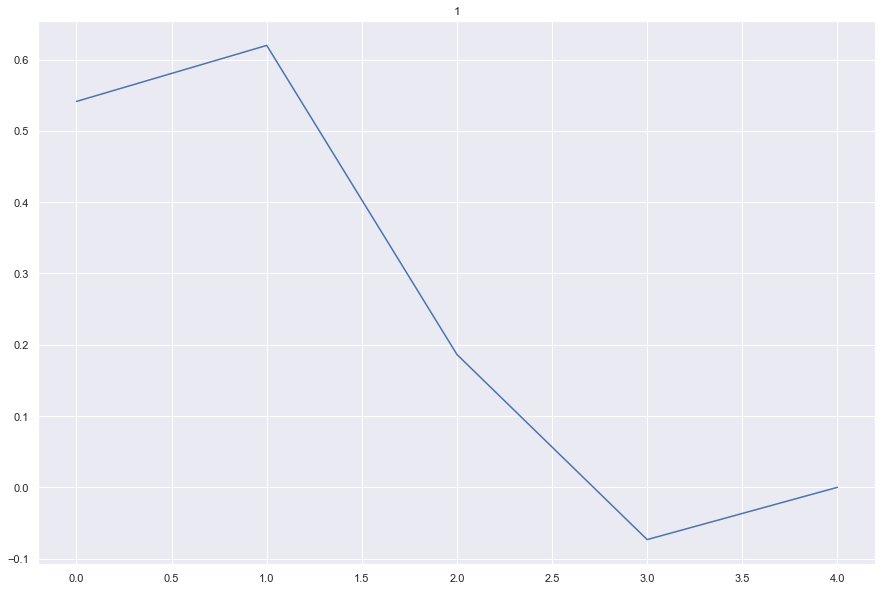

In [28]:
#Plotting sentment changes for the chunck of texts (lyrics)
plt.plot(polarity_lyrics[1])
plt.title(data['titles'].index[1])
plt.show()

<AxesSubplot:>

Text(0.5, 1.0, 'dead man wallking')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'dont ask cuz i dont know')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'for the dreamers')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'life')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'paper planes')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'the wonder years')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'timeless')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'waves of loneliness')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'while you count sheep')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'wutup snow')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, '2 rocking chairs')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'eyes to the sky')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'halloween')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'jim morrison')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'kingdom come')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'newyorksoul')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'one more time')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'superman, the gift and the curse')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'to my future wife...')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'ungrateful eyes')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'when the lions come')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'a haunted house')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'an immigrant')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'carry your throne')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'human')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'jungle')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'luxury')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'munny right')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'ooh')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'pre-occupied')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'run wild')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'simple and sweet')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, "80's films")

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'all time low')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'fashion')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'guillotine')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'hand of god (outro)')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'he is the same')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'irobot')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'maybe idk')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'morning in america')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'new york soul (part ii)')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'overwhelming')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'the good in me')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'weight of the world')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'woke the fuck up')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'adult swim')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'blu')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'cautionary tales')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'conversations with my wife')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'couples retreat')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'jt')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, "let's begin")

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, "mah's joint")

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'stupid deep')

(-1.0, 1.0)

(0.0, 4.0)

<AxesSubplot:>

Text(0.5, 1.0, 'the internet')

(-1.0, 1.0)

(0.0, 4.0)

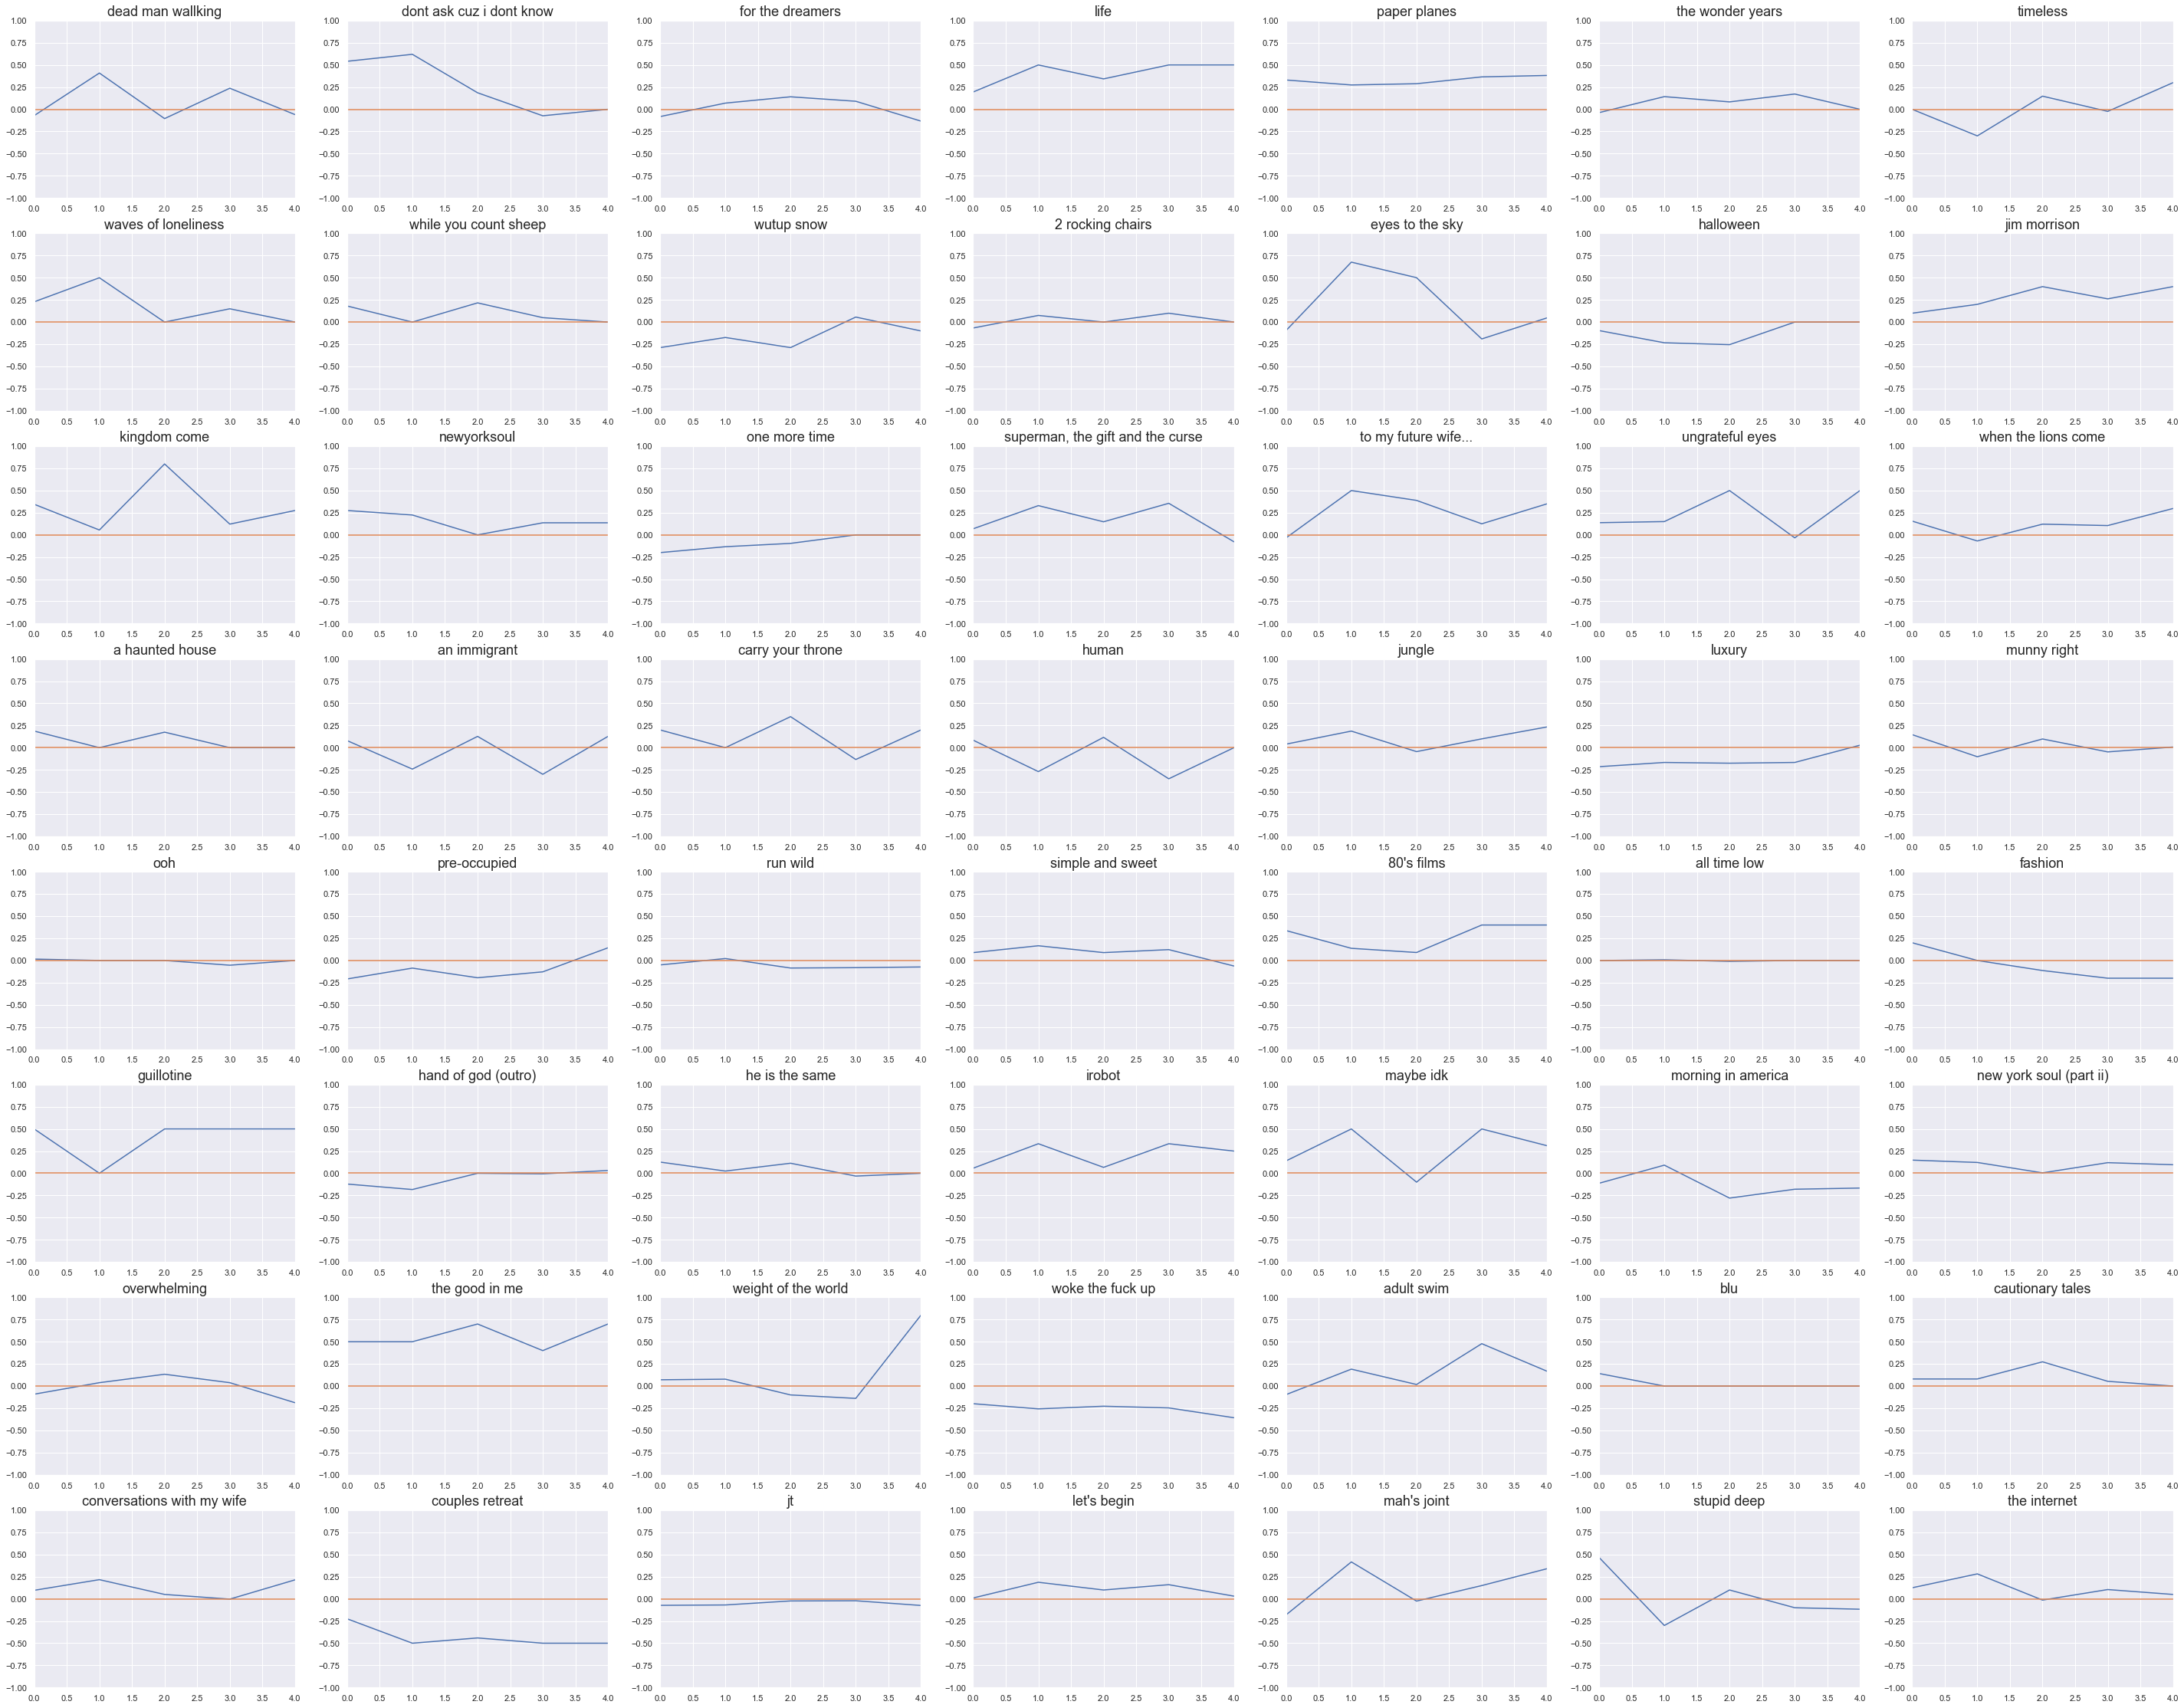

In [29]:
# Plotting for all songs
plt.rcParams['figure.figsize'] = [50, 40]

for index, title in enumerate(data.index):    
    plt.subplot(8, 7, index+1)
    plt.plot(polarity_lyrics[index])
    plt.plot(np.arange(0, 5), np.zeros(5))
    plt.title(data['titles'][index], fontsize = 18)
    plt.ylim(ymin=-1, ymax=1)
    plt.xlim(xmin=0, xmax=4)
    
plt.show()

In [30]:
# A boxplot showcasing the sentiment range for the albums
y0 = data.loc[data['album'] == 'translation_through_speakers']['polarity']
y1 = data.loc[data['album'] == 'the_separation']['polarity']
y2 = data.loc[data['album'] == 'the_definition']['polarity']
y3 = data.loc[data['album'] == 'the_human_condition']['polarity']
y4 = data.loc[data['album'] == 'glory_sound_prep']['polarity']

trace0 = go.Box(
    y = y0,
    name = 'Translation Through Speakers',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)

trace1 = go.Box(
    y = y1,
    name = 'The Separation',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)

trace2 = go.Box(
    y = y2,
    name = 'The Definition',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)

trace3 = go.Box(
    y = y3,
    name = 'The Human Condition',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)

trace4 = go.Box(
    y = y4,
    name = 'Glory Sound Prep',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)

box_data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Sentiment Polarity Box Plot for Jon Bellion Albums'
)

fig = go.Figure(data = box_data, layout = layout)
iplot(fig, filename = 'Sentiment Polarity Box Plot for Jon Bellion Albums')

In [31]:
fig = px.strip(data,
x = data.album,
y = data.polarity.round(3),
hover_name = 'titles',
color = 'album',
labels = {'album': 'Albums', 'y': 'Polarity Score'}
)
fig.show()

In [32]:
# A boxplot showcasing the toxicity range for the albums
y0 = data.loc[data['album'] == 'translation_through_speakers']['toxicity']
y1 = data.loc[data['album'] == 'the_separation']['toxicity']
y2 = data.loc[data['album'] == 'the_definition']['toxicity']
y3 = data.loc[data['album'] == 'the_human_condition']['toxicity']
y4 = data.loc[data['album'] == 'glory_sound_prep']['toxicity']

trace0 = go.Box(
    y = y0,
    name = 'Translation Through Speakers',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)

trace1 = go.Box(
    y = y1,
    name = 'The Separation',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)

trace2 = go.Box(
    y = y2,
    name = 'The Definition',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)

trace3 = go.Box(
    y = y3,
    name = 'The Human Condition',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)

trace4 = go.Box(
    y = y4,
    name = 'Glory Sound Prep',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)

box_data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Toxicity Box Plot for Jon Bellion Albums'
)

fig = go.Figure(data = box_data, layout = layout)
iplot(fig, filename = 'Toxicity Box Plot for Jon Bellion Albums')

In [33]:
data.columns

Index(['titles', 'album', 'date_released', 'lyrics', 'processed_lyrics',
       'empath_themes', 'song_length', 'lyrics_word_count',
       'processed_lyrics_word_count', 'polarity', 'subjectivity', 'toxicity',
       'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_hate'],
      dtype='object')

In [34]:
#Getting top words
def get_top_n_words(corpus, n = None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['processed_lyrics'], 20)

for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['processed_lyrics' , 'count'])

low 212
like 175
know 156
get 147
need 111
come 105
go 86
cause 84
let 84
say 80
love 75
life 75
tell 75
take 68
try 68
call 62
hey 60
make 60
lose 59
still 58


In [35]:
#Plotting the top words and their frequency
df1.groupby('processed_lyrics').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar',
    yTitle='Count', 
    linecolor='black', 
    title='Top 20 words in lyrics')

In [36]:
#Getting top number of bi-gramns
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(data['processed_lyrics'], 20)
for word, freq in common_words:
    print(word, freq)
    
df3 = pd.DataFrame(common_words, columns = ['processed_lyrics' , 'count'])

low low 203
hey hey 31
dead man 23
new york 23
know know 21
nothing changed 20
know maybe 19
need you 18
maybe know 18
say sorry 18
sorry body 18
long think 17
superman save 16
best friend 14
young young 14
go timeless 13
whole life 13
life hand 13
think do 13
dreams dreams 12


In [37]:
#Plotting bi-grams frequency
df3.groupby('processed_lyrics').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black', 
    title='Top 20 bigrams in lyrics')

## Topic Modelling
___

In [38]:
count_vectorizer = CountVectorizer(stop_words = 'english', max_features = 40000)
lyrics_data = data.processed_lyrics.values

print('LYRICS BEFORE VECTORIZATION: {}'.format(lyrics_data[45]))

document_term_matrix = count_vectorizer.fit_transform(lyrics_data)

print('LYRICS AFTER VECTORIZATION: \n{}'.format(document_term_matrix[45]))

LYRICS BEFORE VECTORIZATION: take clothe rip  rip  call hoe tip  tip  tell mine sick of sick game time light the light flame live age everything stag fake feel scar put time run out  need let know that last night wake fuck realize need desperate sounds  last night wake fuck realize need desperate sounds  take wall rip  rip  take  snip  snip  tell  very proud force give in give now cause live age everything stag fake feel scar put time run out  need let know that last night wake fuck realize need desperate sounds  last night wake fuck realize need desperate sounds  last night wake fuck realize need desperate sounds  last night wake fuck realize need desperate sound live age where everything stag fake feel scar put time run out  need let know last night wake fuck realize need desperate sounds  last night wake fuck realize need desperate sounds   
LYRICS AFTER VECTORIZATION: 
  (0, 929)	3
  (0, 278)	1
  (0, 1001)	3
  (0, 973)	3
  (0, 1775)	2
  (0, 1632)	1
  (0, 1353)	1
  (0, 1402)	8
  (0,

In [39]:
from sklearn.decomposition import TruncatedSVD
num_of_topics = 10

lsa_model = TruncatedSVD(n_components = num_of_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

In [40]:
def get_keys(topic_matrix):
    '''
    This returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    This returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [41]:
from collections import Counter
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [42]:
def find_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    This returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(num_of_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [43]:
top_n_words_lsa = find_top_n_words(10, lsa_keys, document_term_matrix, count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  low lose life hand god lie break funeral tear angry
Topic 2:  like need know tell love cause say try feel come
Topic 3:  know maybe guess okay wonder tell welcome dream god cause
Topic 4:  hey home mean legend king travolta come john like house
Topic 5:  come say waves body sorry young close dance wave loneliness
Topic 6:  dead man like homies walking cause know maybe friend sister
Topic 7:  life guillotine rock head lose love try figure build light
Topic 8:  think long need care real day famous life dangerous world
Topic 9:  wake dreams jump sheep count music playing let girl yell
Topic 10:  let timeless cause said clock boy look run wild wanna


In [44]:
topic_labels = ['Loss and Misery',
'Expressing Love & Desperation',
'Contemplation',
'Comfort & Accomplishments',
'Youthfulness',
'Bonds & Relationships',
'Struggle & Turmoil',
'Nurturing',
'Contentment',
'Dream & Fantasies']

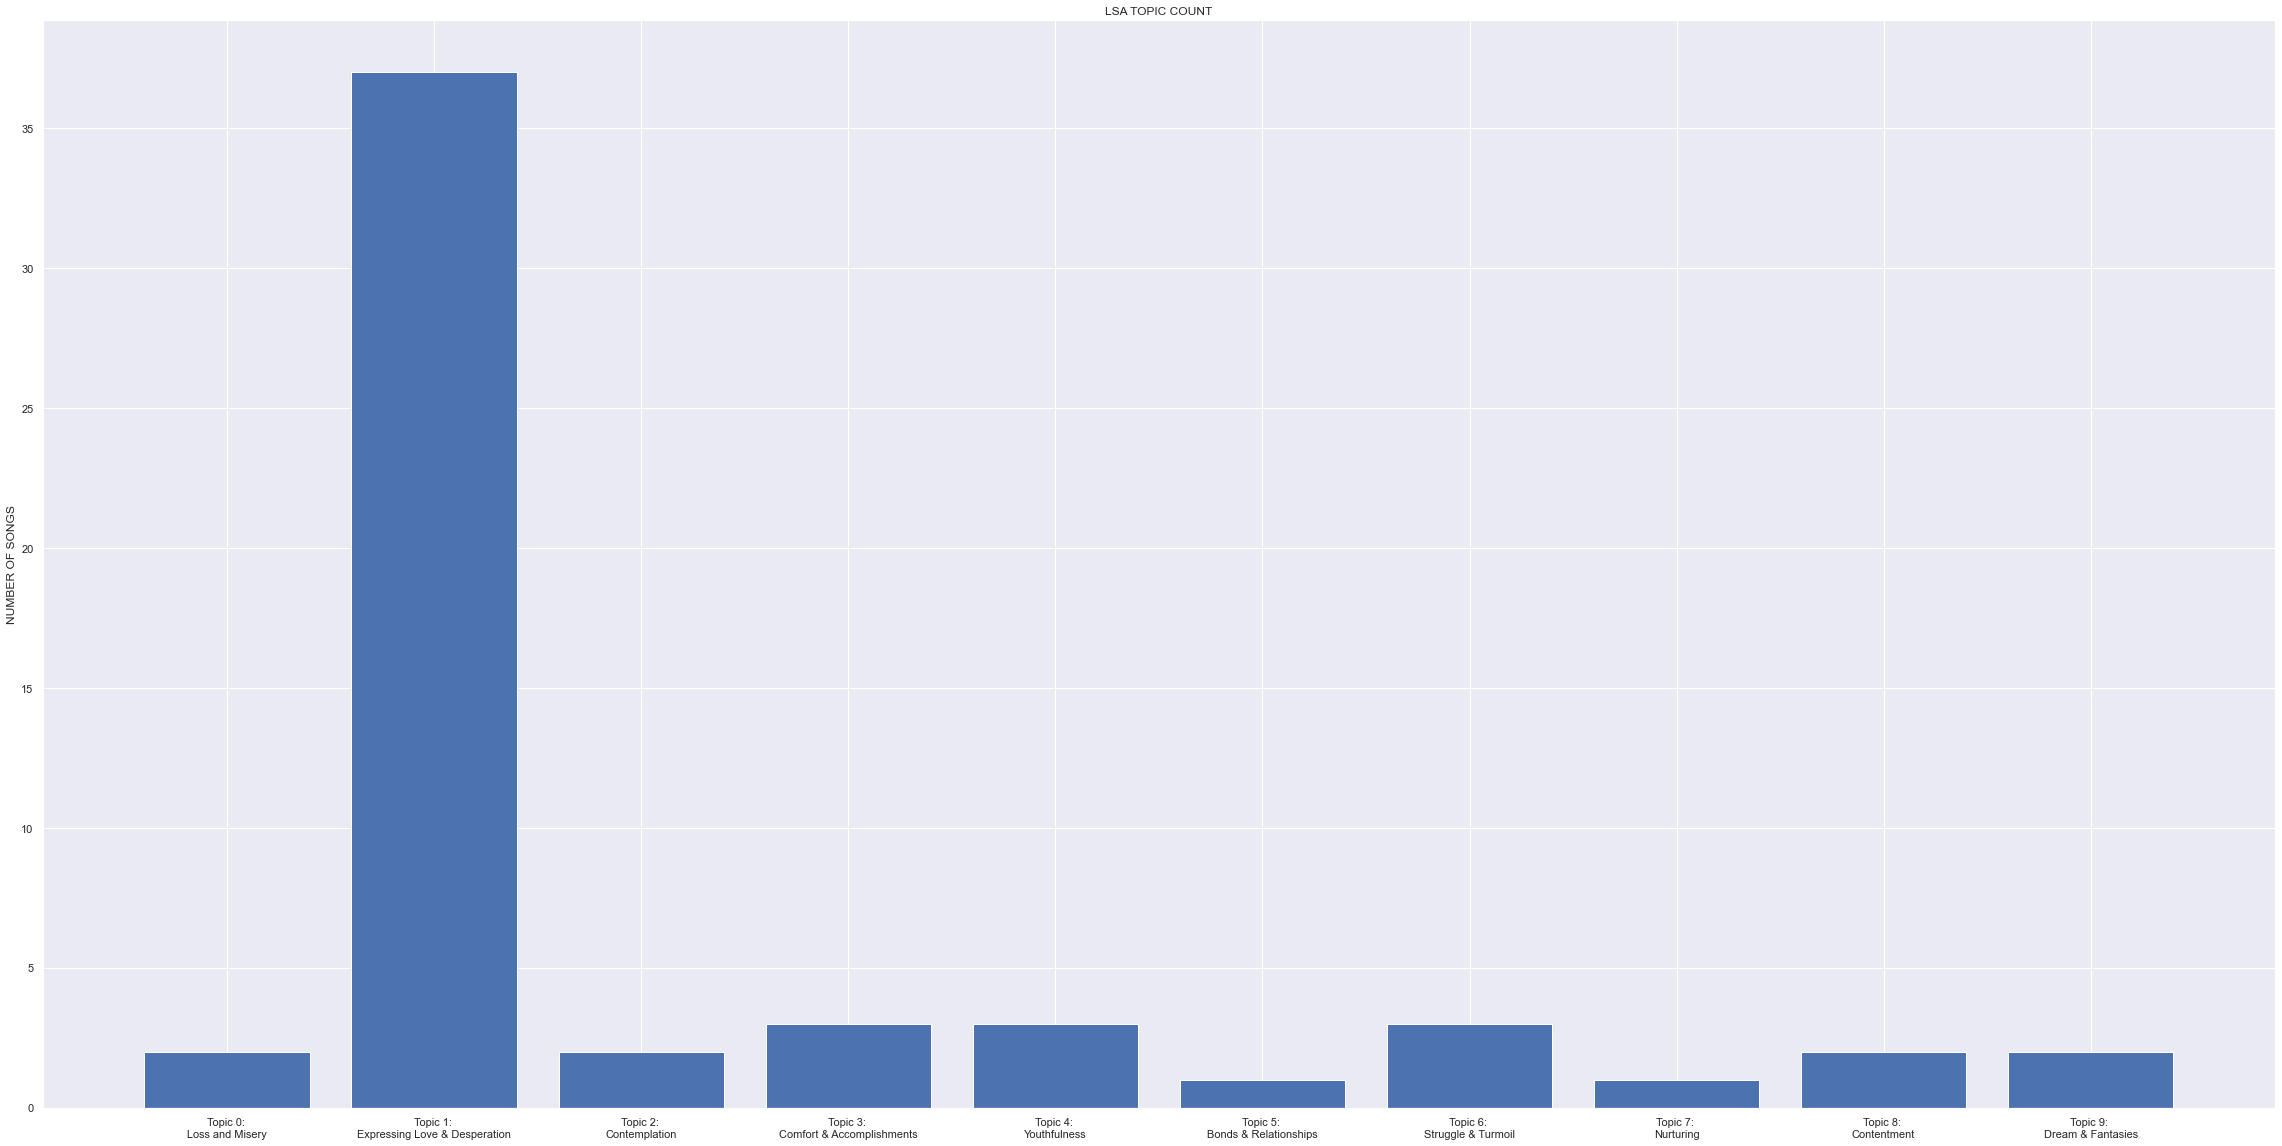

In [45]:
top_5_words = find_top_n_words(5, lsa_keys, document_term_matrix, count_vectorizer)
labels = ['Topic {}: \n'.format(i) + topic_labels[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(40,20))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_title('LSA TOPIC COUNT');
ax.set_ylabel('NUMBER OF SONGS');

In [46]:
from sklearn.manifold import TSNE
tsne_lsa_model = TSNE(n_components = 2, perplexity = 50, learning_rate = 100, n_iter = 2000, verbose = 1, random_state = 0, angle = 0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix) 

[t-SNE] Computing 55 nearest neighbors...
[t-SNE] Indexed 56 samples in 0.000s...
[t-SNE] Computed neighbors for 56 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 56 / 56
[t-SNE] Mean sigma: 29.628971
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.465233
[t-SNE] KL divergence after 950 iterations: 0.007346


In [47]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    This returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(num_of_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [48]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:num_of_topics]

In [49]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

top_5_words_lda = find_top_n_words(5, lsa_keys, document_term_matrix, count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE CLUSTERING OF {} LSA LYRICS TOPICS".format(num_of_topics), plot_width=1200, plot_height=500)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(num_of_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=topic_labels[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

Loading BokehJS ...

GlyphRenderer(id='1039', ...)

In [50]:
data['Topics'] = lsa_keys

In [51]:
data

,titles,album,date_released,lyrics,processed_lyrics,empath_themes,song_length,lyrics_word_count,processed_lyrics_word_count,polarity,subjectivity,toxicity,severe_toxicity,obscene,threat,insult,identity_hate,Topics
0,dead man wallking,translation_through_speakers,"February 20, 2013","[Intro]\nYou know, maybe I'm drunk, maybe I'm ...",know maybe drunk maybe maybe happened maybe ca...,"[death, negative_emotion, kill, violence, frie...",2454,474,263,0.032692,0.464957,0.480705,0.007319,0.189375,0.049681,0.066411,0.016786,5
1,dont ask cuz i dont know,translation_through_speakers,"February 20, 2013","[Verse 1]\nYeah, see, check the bounce out\nWe...",see check bounce welcome dope flow welcome bo...,"[communication, speaking, movement, optimism, ...",2120,408,179,0.309140,0.495161,0.046998,0.000374,0.013157,0.000414,0.003434,0.000614,2
2,for the dreamers,translation_through_speakers,"February 20, 2013","[Intro: Jon Bellion]\nLike some dope shit, ohh...",like dope shit like mad people ...,"[listen, hearing, speaking, negative_emotion, ...",3103,598,267,0.027602,0.655745,0.442370,0.005187,0.349429,0.003059,0.101298,0.014040,8
3,life,translation_through_speakers,"February 20, 2013",[Verse 1]\n22 and confused\nOn what to do and ...,confuse set kind drunk sort high break miss a...,"[fun, masculine, communication, appearance, da...",1614,309,129,0.052500,0.697500,0.015007,0.000162,0.002077,0.000244,0.000758,0.000262,6
4,paper planes,translation_through_speakers,"February 20, 2013","[Verse 1]\nOh, that ass, it was so first class...",ass first class copilot mile high swag would ...,"[air_travel, Anime, movement, traveling, beach]",1865,367,198,0.241650,0.562948,0.585125,0.005497,0.588277,0.001324,0.087882,0.002973,1
5,the wonder years,translation_through_speakers,"February 20, 2013","[Verse 1]\nBefore the war, before the lives\nB...",war live brother leave night kid sing ...,"[love, family, music, listen, children]",1859,415,136,0.055556,0.227595,0.371347,0.004244,0.444217,0.001820,0.042656,0.003317,1
6,timeless,translation_through_speakers,"February 20, 2013",[Chorus]\nFell asleep I had a kick-ass dream\n...,fell asleep kickass dream me frank sinatra jam...,"[morning, night, sleep, alcohol, nervousness]",2769,511,281,0.120194,0.526830,0.357847,0.004277,0.266291,0.003562,0.098018,0.010831,9
7,waves of loneliness,translation_through_speakers,"February 20, 2013",[Verse 1]\nIt's so empty right where your head...,empty right head sleep say still smell cologn...,"[fear, neglect, sadness, disappointment, love]",1668,288,166,0.283673,0.562245,0.163656,0.000857,0.076240,0.000759,0.014115,0.001220,4
8,while you count sheep,translation_through_speakers,"February 20, 2013","[Intro]\nDum, dum, dum, dum, dum, dum\nDum, du...",beautiful mind mind mind literall...,"[music, dance, morning, hearing, listen]",3040,606,216,0.087500,0.554167,0.534456,0.004823,0.251382,0.004816,0.176993,0.015110,8
9,wutup snow,translation_through_speakers,"February 20, 2013","[Pre-Chorus: Jon Bellion]\nHer body is cold, t...",body cold conversation cocaine call snow new ...,"[listen, cold, love, communication, speaking]",2680,510,239,-0.114233,0.655797,0.077586,0.000658,0.011117,0.000749,0.008140,0.004274,1


In [52]:
# data.to_csv('final_jon_bellion_data.csv')

## Search for songs based on a given word

In [53]:
import nltk
from nltk.corpus import wordnet
nltk.download('wordnet', quiet = True)
import inflect
def find_synonym(word_entry):
    found_synonyms = []
    for synonym in wordnet.synsets(word_entry):
        for lemma in synonym.lemmas():
            found_synonyms.append(lemma.name())
    return list(set(found_synonyms))

def song_search(value, df, toggle):
    if value == '':
        if df.shape[0] < 25:
            return df, df.shape[0]
        return df[:], df.shape[0]
    df_out = pd.DataFrame({'titles': [], 'album': [], 'date_released': [], 'lyrics': []})
    if toggle == 'Lyrics':
        x = []
        for i in value.split():
            x.extend(find_synonym(i)) # + find_synonym(p.plural(i)))
        if x == []:
            df_out = df.loc[df['processed_lyrics'].str.contains(value, case = False, na = False)]
        else:
            reg = ' | '.join(x)
            reg = ' ' + reg
            df_out = df.loc[df['processed_lyrics'].str.contains(reg, regex = True, case = False, na = False)]

    if toggle == 'Tags':
        x = value.split(' ')
        reg = ' | '.join(x)
        df_out = df.loc[df['empath_themes'].str.contains(' ' + reg, regex = True, case = False, na = False)]

    if df_out.shape[0] < 25:
        return df_out, df_out.shape[0]
    return df_out[:], df_out.shape[0]

True

In [54]:
find_synonym('sad')

['distressing', 'sorry', 'pitiful', 'deplorable', 'sad', 'lamentable']

In [55]:
import ipywidgets as widgets
search_toggle = widgets.Dropdown(
    options = ['Lyrics', 'Tags'],
    descriptiona = 'Search:',
    disabled = False
)

search = widgets.Text(
    placeholder = 'Type Something',
    description = 'Search:',
    disabled = False
)

display(search_toggle)
display(search)

Dropdown(options=('Lyrics', 'Tags'), value='Lyrics')

Text(value='', description='Search:', placeholder='Type Something')

In [59]:
from IPython.display import HTML, display
fr_sh, size = song_search(search.value, data, search_toggle.value)
df = fr_sh[['titles', 'album']].to_html(escape = False, index = False)
print('Number of songs about', search.value, 'is: ' + str(size))
display(HTML(df))

Number of songs about beautiful is: 7


titles,album
dead man wallking,translation_through_speakers
dont ask cuz i dont know,translation_through_speakers
while you count sheep,translation_through_speakers
wutup snow,translation_through_speakers
when the lions come,the_separation
pre-occupied,the_definition
adult swim,glory_sound_prep
